# Importing Libraries

In [55]:
import numpy as np 
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
warnings.filterwarnings("ignore")

# Loading dataset

In [57]:
df1 = pd.read_csv("D:\DATASETS_THESIS\diabetes\diabetes.csv")

In [58]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [59]:
df1.head(25)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [60]:
df1.shape

(768, 9)

In [61]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [62]:
df1.isnull().values.any()

False

In [63]:
df1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [64]:
df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [65]:
df1.duplicated().sum()

0

In [66]:
df1.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [67]:
df1['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# Outliers

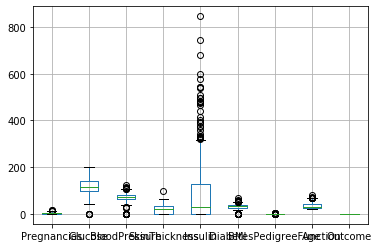

In [68]:
df1.plot.box(grid='True')

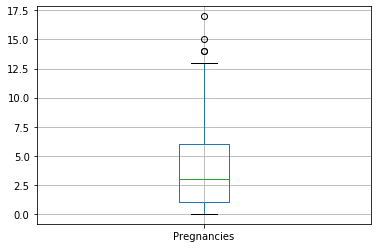

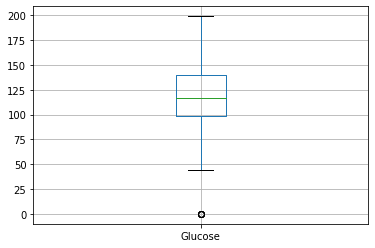

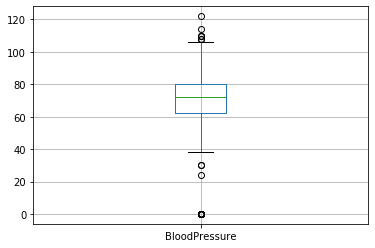

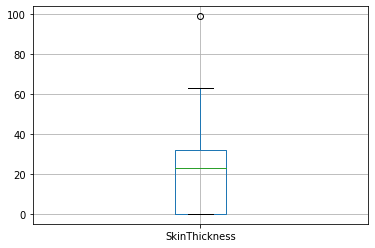

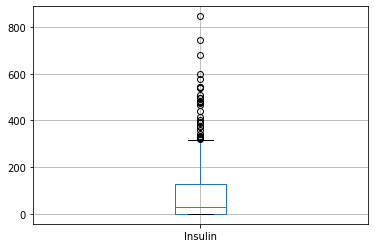

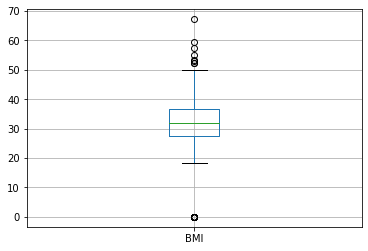

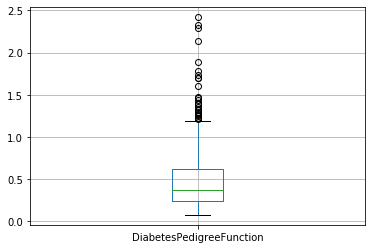

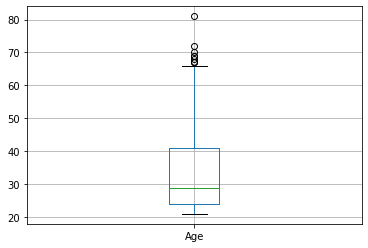

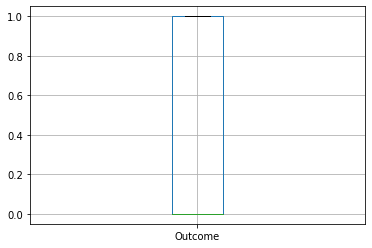

In [69]:
for i in df1.columns:
    df1.boxplot(column=i)
    plt.show()

In [70]:
min_thresold_Pregnancies = 0
max_thresold_Pregnancies = 15

min_thresold_Glucose = df1.Glucose.quantile(0.001)
max_thresold_Glucose = df1.Glucose.quantile(0.999)

min_thresold_DiabetesPedigreeFunction = df1.DiabetesPedigreeFunction.quantile(0.001)
max_thresold_DiabetesPedigreeFunction = df1.DiabetesPedigreeFunction.quantile(0.999)

print(min_thresold_DiabetesPedigreeFunction)
print(max_thresold_DiabetesPedigreeFunction)

0.082602
2.350203000000006


In [71]:
#min_threshold_Insulin = df1.Insulin.quantile(0.5)
# max_threshold_Insulin = df1.Insulin.quantile(0.89)
# print(min_thresold_Insulin)
# print(max_thresold_Insulin)

In [72]:
df2= df1[(df1.DiabetesPedigreeFunction < max_thresold_DiabetesPedigreeFunction) & (df1.Glucose < max_thresold_Glucose) & (df1.Pregnancies <= max_thresold_Pregnancies)]
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Univariate Feature Selection

In [73]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
x=df2.iloc[:,:-1]
y=df2.iloc[:,-1:]

In [74]:
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(x,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

featureScores

print(featureScores.nlargest(5,'Score'))

         Specs        Score
4      Insulin  2245.870785
1      Glucose  1364.504306
7          Age   183.933343
5          BMI   119.608805
0  Pregnancies   109.137425


In [75]:
df3=df2.drop(['SkinThickness','BloodPressure','DiabetesPedigreeFunction'],axis=1)

In [76]:
df3

,Pregnancies,Glucose,Insulin,BMI,Age,Outcome
0,6,148,0,33.6,50,1
1,1,85,0,26.6,31,0
2,8,183,0,23.3,32,1
3,1,89,94,28.1,21,0
4,0,137,168,43.1,33,1
...,...,...,...,...,...,...
763,10,101,180,32.9,63,0
764,2,122,0,36.8,27,0
765,5,121,112,26.2,30,0
766,1,126,0,30.1,47,1


In [77]:
import dataframe_image as dfi
dfi.export(df3,'df3.png',max_rows=5,)

# Binning

### Binning BMI

In [78]:
bins =  [0, 18.6, 25, 30, 80]

group_names = ['underweight', 'normal', 'overweight', 'obese']
df3['bmi_categories'] = pd.cut(df3['BMI'], bins, labels=group_names, right=False)
df3

,Pregnancies,Glucose,Insulin,BMI,Age,Outcome,bmi_categories
0,6,148,0,33.6,50,1,obese
1,1,85,0,26.6,31,0,overweight
2,8,183,0,23.3,32,1,normal
3,1,89,94,28.1,21,0,overweight
4,0,137,168,43.1,33,1,obese
...,...,...,...,...,...,...,...
763,10,101,180,32.9,63,0,obese
764,2,122,0,36.8,27,0,obese
765,5,121,112,26.2,30,0,overweight
766,1,126,0,30.1,47,1,obese


In [79]:
pd.cut(df3['BMI'], bins, right=False)

0      [30.0, 80.0)
1      [25.0, 30.0)
2      [18.6, 25.0)
3      [25.0, 30.0)
4      [30.0, 80.0)
           ...     
763    [30.0, 80.0)
764    [30.0, 80.0)
765    [25.0, 30.0)
766    [30.0, 80.0)
767    [30.0, 80.0)
Name: BMI, Length: 765, dtype: category
Categories (4, interval[float64]): [[0.0, 18.6) < [18.6, 25.0) < [25.0, 30.0) < [30.0, 80.0)]

### Binning Age

In [80]:
bins = [20,40,60,100]
group_names = ['Young_Adult', 'Middle_Aged_Adult', 'Old']
df3['age_categories'] = pd.cut(df3['Age'], bins, labels=group_names)
df3

,Pregnancies,Glucose,Insulin,BMI,Age,Outcome,bmi_categories,age_categories
0,6,148,0,33.6,50,1,obese,Middle_Aged_Adult
1,1,85,0,26.6,31,0,overweight,Young_Adult
2,8,183,0,23.3,32,1,normal,Young_Adult
3,1,89,94,28.1,21,0,overweight,Young_Adult
4,0,137,168,43.1,33,1,obese,Young_Adult
...,...,...,...,...,...,...,...,...
763,10,101,180,32.9,63,0,obese,Old
764,2,122,0,36.8,27,0,obese,Young_Adult
765,5,121,112,26.2,30,0,overweight,Young_Adult
766,1,126,0,30.1,47,1,obese,Middle_Aged_Adult


In [81]:
pd.cut(df3['Age'], bins, right=False)

0       [40, 60)
1       [20, 40)
2       [20, 40)
3       [20, 40)
4       [20, 40)
         ...    
763    [60, 100)
764     [20, 40)
765     [20, 40)
766     [40, 60)
767     [20, 40)
Name: Age, Length: 765, dtype: category
Categories (3, interval[int64]): [[20, 40) < [40, 60) < [60, 100)]

In [82]:
df3['age_categories'].value_counts()

Young_Adult          572
Middle_Aged_Adult    166
Old                   27
Name: age_categories, dtype: int64

In [83]:
df3['bmi_categories'].value_counts()

obese          469
overweight     179
normal         102
underweight     15
Name: bmi_categories, dtype: int64

In [84]:
df3_new = df3.drop(['BMI','Age'], axis=1)

In [85]:
df3_new

,Pregnancies,Glucose,Insulin,Outcome,bmi_categories,age_categories
0,6,148,0,1,obese,Middle_Aged_Adult
1,1,85,0,0,overweight,Young_Adult
2,8,183,0,1,normal,Young_Adult
3,1,89,94,0,overweight,Young_Adult
4,0,137,168,1,obese,Young_Adult
...,...,...,...,...,...,...
763,10,101,180,0,obese,Old
764,2,122,0,0,obese,Young_Adult
765,5,121,112,0,overweight,Young_Adult
766,1,126,0,1,obese,Middle_Aged_Adult


In [86]:
df3_new=df3_new[['Pregnancies','Glucose','Insulin','bmi_categories','age_categories','Outcome']]

In [87]:
df3_new

,Pregnancies,Glucose,Insulin,bmi_categories,age_categories,Outcome
0,6,148,0,obese,Middle_Aged_Adult,1
1,1,85,0,overweight,Young_Adult,0
2,8,183,0,normal,Young_Adult,1
3,1,89,94,overweight,Young_Adult,0
4,0,137,168,obese,Young_Adult,1
...,...,...,...,...,...,...
763,10,101,180,obese,Old,0
764,2,122,0,obese,Young_Adult,0
765,5,121,112,overweight,Young_Adult,0
766,1,126,0,obese,Middle_Aged_Adult,1


# One-Hot Encoding

### One-Hot Encoding on Age

In [88]:
def encode_and_bind(df3_new, feature_to_encode):
    dummies = pd.get_dummies(df3_new[[feature_to_encode]])
    res = pd.concat([df3_new, dummies], axis=1)
    return(res)

In [89]:
df3_new1 = encode_and_bind(df3_new, 'age_categories')

In [90]:
df3_new1

,Pregnancies,Glucose,Insulin,bmi_categories,age_categories,Outcome,age_categories_Young_Adult,age_categories_Middle_Aged_Adult,age_categories_Old
0,6,148,0,obese,Middle_Aged_Adult,1,0,1,0
1,1,85,0,overweight,Young_Adult,0,1,0,0
2,8,183,0,normal,Young_Adult,1,1,0,0
3,1,89,94,overweight,Young_Adult,0,1,0,0
4,0,137,168,obese,Young_Adult,1,1,0,0
...,...,...,...,...,...,...,...,...,...
763,10,101,180,obese,Old,0,0,0,1
764,2,122,0,obese,Young_Adult,0,1,0,0
765,5,121,112,overweight,Young_Adult,0,1,0,0
766,1,126,0,obese,Middle_Aged_Adult,1,0,1,0


### One-Hot Encoding of BMI

In [91]:
def encode_and_bind(df3_new1, feature_to_encode):
    dummies = pd.get_dummies(df3_new1[[feature_to_encode]])
    res = pd.concat([df3_new1, dummies], axis=1)
    return(res)

In [92]:
df3_new2 = encode_and_bind(df3_new1, 'bmi_categories')

In [93]:
df3_new2

,Pregnancies,Glucose,Insulin,bmi_categories,age_categories,Outcome,age_categories_Young_Adult,age_categories_Middle_Aged_Adult,age_categories_Old,bmi_categories_underweight,bmi_categories_normal,bmi_categories_overweight,bmi_categories_obese
0,6,148,0,obese,Middle_Aged_Adult,1,0,1,0,0,0,0,1
1,1,85,0,overweight,Young_Adult,0,1,0,0,0,0,1,0
2,8,183,0,normal,Young_Adult,1,1,0,0,0,1,0,0
3,1,89,94,overweight,Young_Adult,0,1,0,0,0,0,1,0
4,0,137,168,obese,Young_Adult,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,180,obese,Old,0,0,0,1,0,0,0,1
764,2,122,0,obese,Young_Adult,0,1,0,0,0,0,0,1
765,5,121,112,overweight,Young_Adult,0,1,0,0,0,0,1,0
766,1,126,0,obese,Middle_Aged_Adult,1,0,1,0,0,0,0,1


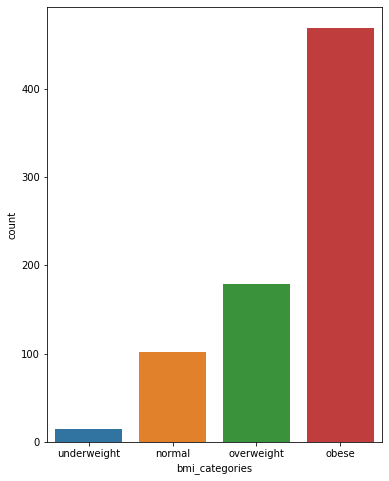

In [94]:
plt.figure(figsize=(6,8))
sns.countplot(df3_new2['bmi_categories'])

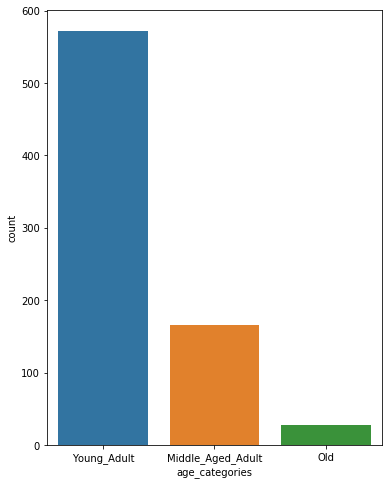

In [95]:
plt.figure(figsize=(6,8))
sns.countplot(df3_new2['age_categories'])

In [96]:
df3_new = df3_new2.drop(['bmi_categories','age_categories'], axis=1)
df3_new

,Pregnancies,Glucose,Insulin,Outcome,age_categories_Young_Adult,age_categories_Middle_Aged_Adult,age_categories_Old,bmi_categories_underweight,bmi_categories_normal,bmi_categories_overweight,bmi_categories_obese
0,6,148,0,1,0,1,0,0,0,0,1
1,1,85,0,0,1,0,0,0,0,1,0
2,8,183,0,1,1,0,0,0,1,0,0
3,1,89,94,0,1,0,0,0,0,1,0
4,0,137,168,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,180,0,0,0,1,0,0,0,1
764,2,122,0,0,1,0,0,0,0,0,1
765,5,121,112,0,1,0,0,0,0,1,0
766,1,126,0,1,0,1,0,0,0,0,1


In [97]:
df_new=df3_new[['Pregnancies','Glucose','Insulin','bmi_categories_underweight','bmi_categories_normal','bmi_categories_overweight', 'bmi_categories_obese','age_categories_Young_Adult', 'age_categories_Middle_Aged_Adult', 'age_categories_Old','Outcome']]

In [98]:
df_new

,Pregnancies,Glucose,Insulin,bmi_categories_underweight,bmi_categories_normal,bmi_categories_overweight,bmi_categories_obese,age_categories_Young_Adult,age_categories_Middle_Aged_Adult,age_categories_Old,Outcome
0,6,148,0,0,0,0,1,0,1,0,1
1,1,85,0,0,0,1,0,1,0,0,0
2,8,183,0,0,1,0,0,1,0,0,1
3,1,89,94,0,0,1,0,1,0,0,0
4,0,137,168,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,180,0,0,0,1,0,0,1,0
764,2,122,0,0,0,0,1,1,0,0,0
765,5,121,112,0,0,1,0,1,0,0,0
766,1,126,0,0,0,0,1,0,1,0,1


In [99]:
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1:]

In [100]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)

In [101]:
y_train['Outcome'].value_counts()

0    401
1    211
Name: Outcome, dtype: int64

In [102]:
y_test['Outcome'].value_counts()

0    99
1    54
Name: Outcome, dtype: int64

In [103]:
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(1)
x_train,y_train = os.fit_resample(x_train,y_train)

In [104]:
x_train.shape

(802, 10)

In [105]:
y_train['Outcome'].value_counts()

1    401
0    401
Name: Outcome, dtype: int64

In [106]:
y_test['Outcome'].value_counts()

0    99
1    54
Name: Outcome, dtype: int64

# Building Models

### DecisionTree Classifier

In [42]:
from sklearn.model_selection import cross_val_score
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
accuracies = cross_val_score(estimator = dt_model, X = x_train, y = y_train, cv = 10) 
np.average(accuracies)

0.8156790123456791

In [43]:
from sklearn.model_selection import GridSearchCV

#Large C value gives low bias and high variance and vice-versa
tree_para = {'criterion':['gini'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90]}
grid = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90]})

In [44]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=50)

In [45]:

best_grid=grid.best_estimator_

In [46]:
best_grid

DecisionTreeClassifier(max_depth=50)

In [47]:
y_pred=best_grid.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[78 21]
 [21 33]]
Accuracy Score 0.7254901960784313
Classification report:               precision    recall  f1-score   support

           0       0.79      0.79      0.79        99
           1       0.61      0.61      0.61        54

    accuracy                           0.73       153
   macro avg       0.70      0.70      0.70       153
weighted avg       0.73      0.73      0.73       153



# RandomForest Classifier 

In [48]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)#Confusion Matrix
accuracies = cross_val_score(estimator = rf_model, X = x_train, y = y_train, cv = 10, verbose=2) 
np.average(accuracies)

[[85 14]
 [26 28]]
[CV] END .................................................... total time=   0.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.5s finished


0.8580092592592592

In [49]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [2,4]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
bootstrap = [True, False]

In [50]:
parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
grid_search = GridSearchCV(estimator =rf_model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = StratifiedKFold(10),
                           n_jobs = -1)
grid_search = grid_search.fit(x_train, y_train)

In [162]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 72}

In [163]:
rf_model=RandomForestClassifier(random_state=42, max_features='auto', 
                                 n_estimators= 200, max_depth=8, criterion='gini')
rf_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=200, random_state=42)

In [164]:
# pred=rfc1.predict(x_test)

In [165]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.7581699346405228
[[88 11]
 [26 28]]


# Support Vector Classifier

In [166]:
svc = SVC(kernel = 'linear', random_state = 0)
svc.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [167]:
y_pred = svc.predict(x_test)

In [168]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

[[78 21]
 [20 34]]
0.7320261437908496


In [169]:
svc = SVC(kernel='rbf',gamma=0.3)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print(confusion_matrix(y_test, y_pred))  
accuracies = cross_val_score(estimator = svc, X = x_train, y = y_train, cv = StratifiedKFold(10)) 
np.average(accuracies)

[[92  7]
 [44 10]]


0.858101851851852

### Gaussian Naive Bayes

In [170]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
print(confusion_matrix(y_test, y_pred))
accuracies = cross_val_score(estimator = gnb, X = x_train, y = y_train, cv=10) 
np.average(accuracies)

[[52 47]
 [ 9 45]]


0.6945987654320988

In [171]:
parameters = {'var_smoothing': np.logspace(0,-9, num=100)}
grid_search = GridSearchCV(estimator =gnb,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = StratifiedKFold(10),
                           n_jobs = -1)
grid_search = grid_search.fit(x_train, y_train)

In [172]:
grid_search.best_params_

{'var_smoothing': 2.310129700083158e-06}

In [173]:
gnb = GaussianNB(var_smoothing=4.328761281083053e-06)
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
print(confusion_matrix(y_test, y_pred)) 
accuracies = cross_val_score(estimator = gnb, X = x_train, y = y_train, cv = StratifiedKFold(10)) 
np.average(accuracies)

[[71 28]
 [18 36]]


0.7418981481481481

# Bernoulli Naive Bayes

In [174]:
bnb = BernoulliNB()
bnb.fit(x_train, y_train)
y_pred = bnb.predict(x_test)
cm = confusion_matrix(y_test, y_pred)  
accuracies = cross_val_score(estimator = bnb, X = x_train, y = y_train, cv = 10) 
np.average(accuracies)

0.669537037037037

In [175]:
parameters = {"alpha":[1.0,2.0],'binarize':[0.0,1.0],"fit_prior":[True,False], 'class_prior':[0,1,2,3,4,5,6,None]}
grid_search = GridSearchCV(estimator =bnb,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = StratifiedKFold(10),
                           n_jobs = -1)
grid_search = grid_search.fit(x_train, y_train)

In [176]:
grid_search.best_params_

{'alpha': 1.0, 'binarize': 0.0, 'class_prior': None, 'fit_prior': True}

In [177]:
bnb = BernoulliNB(alpha= 1.0,
                  binarize= 1.0,
                  class_prior= None,
                  fit_prior= True)
bnb.fit(x_train, y_train)
y_pred = bnb.predict(x_test)
cm = confusion_matrix(y_test, y_pred)  
accuracies = cross_val_score(estimator = bnb, X = x_train, y = y_train, cv = StratifiedKFold(10)) 
np.average(accuracies)

0.534861111111111

In [1]:
import numpy as np
import math
from numpy import linalg

import sklearn
from sklearn import datasets
from sklearn.neighbors import kneighbors_graph

import scipy.optimize as sco

from itertools import cycle, islice

class LapSVM(object):

    def _init_(self, n_neighbors, kernel, lambda_k, lambda_u):
        """
        Laplacian Support Vector Machines
        Parameters
        ----------
        n_neighbors : integer
            Number of neighbors to use when constructing the graph
        lambda_k : float
        lambda_u : float
        """
        self.n_neighbors = n_neighbors
        self.kernel = kernel
        self.lambda_k = lambda_k
        self.lambda_u = lambda_u
    

    def fit(self, X, X_no_label, Y):
        """
        Fit the model
        
        Parameters
        ----------
        X : ndarray shape (n_labeled_samples, n_features)
            Labeled data
        X_no_label : ndarray shape (n_unlabeled_samples, n_features)
            Unlabeled data
        Y : ndarray shape (n_labeled_samples,)
            Labels
        """
        # Storing parameters
        l = X.shape[0]
        u = X_no_label.shape[0]
        n = l + u
        
        # Building main matrices
        self.X = np.concatenate([X, X_no_label], axis=0)
        Y = np.diag(Y)
        
        # Memory optimization
        del X_no_label
        
        # Building adjacency matrix from the knn graph
        print('Computing adjacent matrix', end='...')
        W = kneighbors_graph(self.X, self.n_neighbors, mode='connectivity')
        W = (((W + W.T) > 0) * 1)
        print('done')

        # Computing Graph Laplacian
        print('Computing laplacian graph', end='...')
        L = np.diag(W.sum(axis=0)) - W
        print('done')

        # Computing K with k(i,j) = kernel(i, j)
        print('Computing kernel matrix', end='...')
        K = self.kernel(self.X,self.X,1)
        print('done')

        # Creating matrix J [I (l x l), 0 (l x (l+u))]
        J = np.concatenate([np.identity(l), np.zeros(l * u).reshape(l, u)], axis=1)

        ###########################################################################
        
        # Computing "almost" alpha
        print('Inverting matrix', end='...')
        almost_alpha = np.linalg.inv(2 * self.lambda_k * np.identity(l + u) \
                                     + ((2 * self.lambda_u) / (l + u) ** 2) * L.dot(K)).dot(J.T).dot(Y)
        
        # Computing Q
        Q = Y.dot(J).dot(K).dot(almost_alpha)
        print('done')
        
        # Memory optimization
        del W, L, K, J
        
        # Solving beta using scypy optimize function
        
        print('Solving beta', end='...')
        
        e = np.ones(l)
        q = -e
        
        # ===== Objectives =====
        def objective_func(beta):
            return (1 / 2) * beta.dot(Q).dot(beta) + q.dot(beta)
        
        def objective_grad(beta):
            return np.squeeze(np.array(beta.T.dot(Q) + q))
        
        # =====Constraint(1)=====
        #   0 <= beta_i <= 1 / l
        bounds = [(0, 1 / l) for _ in range(l)]
        
        # =====Constraint(2)=====
        #  Y.dot(beta) = 0
        def constraint_func(beta):
            return beta.dot(np.diag(Y))
        
        def constraint_grad(beta):
            return np.diag(Y)
        
        cons = {'type': 'eq', 'fun': constraint_func, 'jac': constraint_grad}
        
        # ===== Solving =====
        x0 = np.zeros(l)
        
        beta_hat = sco.minimize(objective_func, x0, jac=objective_grad, \
                                constraints=cons, bounds=bounds, method='L-BFGS-B')['x']
        print('done')
        
        # Computing final alpha
        print('Computing alpha', end='...')
        self.alpha = almost_alpha.dot(beta_hat)
        print('done')
        
        del almost_alpha, Q
        
        ###########################################################################
        
        # Finding optimal decision boundary b using labeled data
        new_K = self.kernel(self.X, X,10)
        f = np.squeeze(np.array(self.alpha)).dot(new_K)
        
        def to_minimize(b):
            predictions = np.array((f > b) * 1)
            return - (sum(predictions == np.diag(Y)) / len(predictions))
        
        bs = np.linspace(0, 1, num=101)
        res = np.array([to_minimize(b) for b in bs])
        self.b = bs[res == np.min(res)][0]
    

    def predict(self, Xtest):
        """
        Parameters
        ----------
        Xtest : ndarray shape (n_samples, n_features)
            Test data
            
        Returns
        -------
        predictions : ndarray shape (n_samples, )
            Predicted labels for Xtest
        """

        # Computing K_new for X
        new_K = self.kernel(self.X, Xtest,1)
        f = np.squeeze(np.array(self.alpha)).dot(new_K)
        predictions = np.array((f > self.b) * 1)
        return predictions
    

    def accuracy(self, Xtest, Ytrue):
        """
        Parameters
        ----------
        Xtest : ndarray shape (n_samples, n_features)
            Test data
        Ytrue : ndarray shape (n_samples, )
            Test labels
        """
        predictions = self.predict(Xtest)
        accuracy = sum(predictions == Ytrue) / len(predictions)
        print('Accuracy: {}%'.format(round(accuracy * 100, 2)))

In [2]:
def rbf(X1,X2,kwargs):
    return np.exp(-cdist(X1,X2)**2*kwargs)


In [3]:
df_new1 = df_new.drop(['Outcome'],axis=1)
df_new1

NameError: name 'df_new' is not defined

In [4]:
s=LapSVM(5,rbf,0.03125,10000)
s.fit(x,df_new1,y)

TypeError: LapSVM() takes no arguments

In [ ]:

s.accuracy(x_test,y_test)